In [1]:
pip install facenet-pytorch

Note: you may need to restart the kernel to use updated packages.


In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image

In [29]:
mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20) # initializing mtcnn for face detection
resnet = InceptionResnetV1(pretrained='vggface2').eval() # initializing resnet for face img to embeding conversion

dataset=datasets.ImageFolder('data/train/') # photos folder path

In [30]:
dataset

Dataset ImageFolder
    Number of datapoints: 97
    Root location: data/train/

In [31]:
idx_to_class = {i:c for c,i in dataset.class_to_idx.items()}

In [32]:
idx_to_class

{0: 'affan',
 1: 'asad',
 2: 'ben_afflek',
 3: 'elton_john',
 4: 'jerry_seinfeld',
 5: 'khizar',
 6: 'madonna',
 7: 'mindy_kaling'}

In [33]:
def collate_fn(x):
    return x[0]

loader = DataLoader(dataset, collate_fn=collate_fn)

In [34]:
face_list = [] # list of cropped faces from photos folder
name_list = [] # list of names corrospoing to cropped photos
embedding_list = [] # list of embeding matrix after conversion from cropped faces to embedding matrix using resnet

for img, idx in loader:
    face, prob = mtcnn(img, return_prob=True) 
    if face is not None and prob>0.90: # if face detected and porbability > 90%
        emb = resnet(face.unsqueeze(0)) # passing cropped face into resnet model to get embedding matrix
        embedding_list.append(emb.detach()) # resulten embedding matrix is stored in a list
        name_list.append(idx_to_class[idx]) # names are stored in a list

In [35]:
data = [embedding_list, name_list]
torch.save(data, 'data.pt') # saving data.pt file

In [36]:
def face_match(img_path, data_path): # img_path= location of photo, data_path= location of data.pt 
    # getting embedding matrix of the given img
    img = Image.open(img_path)
    face, prob = mtcnn(img, return_prob=True) # returns cropped face and probability
    emb = resnet(face.unsqueeze(0)).detach() # detech is to make required gradient false
    
    saved_data = torch.load('data.pt') # loading data.pt file
    embedding_list = saved_data[0] # getting embedding data
    name_list = saved_data[1] # getting list of names
    dist_list = [] # list of matched distances, minimum distance is used to identify the person
    
    for idx, emb_db in enumerate(embedding_list):
        dist = torch.dist(emb, emb_db).item()
        dist_list.append(dist)
        
    idx_min = dist_list.index(min(dist_list))
    return (name_list[idx_min], min(dist_list))


In [37]:
import matplotlib.pyplot as plt
# image = ['img1.jpg','img2.jpg','img3.jpg','img4.jpg','img5.jpeg']
# for i in image:
#     result = face_match(i, 'data.pt')
#     plt.imshow(plt.imread(i))
#     plt.show()
#     print('Face matched with: ',result[0], 'With distance: ',result[1])

In [40]:
import os

validation_directory = "data/val/"  

image_paths = []

# Walk through the validation directory and its subdirectories
for root, dirs, files in os.walk(validation_directory):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            # Check if the file has an image extension (you can extend this list)
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Now, image_paths will contain the paths of all image files in the validation directory and its subdirectories.
for image_path in image_paths:
    print(image_path)


data/val/affan\WhatsApp Image 2023-10-12 at 12.42.18 PM (1).jpeg
data/val/affan\WhatsApp Image 2023-10-12 at 12.42.18 PM (2).jpeg
data/val/asad\img5.jpeg
data/val/ben_afflek\httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg
data/val/ben_afflek\httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTENDgMDUODczNDcNTcjpg.jpg
data/val/ben_afflek\httpbpblogspotcomedLMjVpRGkSWexgsXjkNIAAAAAAAADWgFFtAUqBlhAsjpg.jpg
data/val/ben_afflek\httpcsvkmeuaafdfjpg.jpg
data/val/ben_afflek\httpcsvkmeuadecafjpg.jpg
data/val/elton_john\httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg
data/val/elton_john\httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancewatchnowjpg.jpg
data/val/elton_john\httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnstillstandingbrooklynnewyearsjpg.jpg
data/val/elton_john\httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnsupportsbrucejennerstransitiontowomanjpg.jpg
data/val/elton_john\httpcdnlyricssongonlyricsnetwp

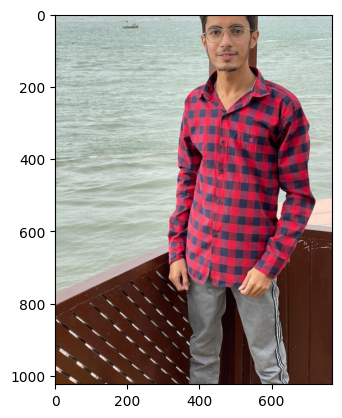

Face matched with:  affan With distance:  0.844512403011322


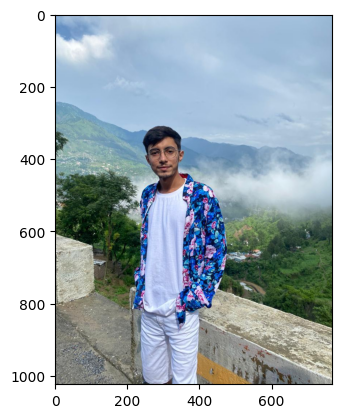

Face matched with:  affan With distance:  0.7707030177116394


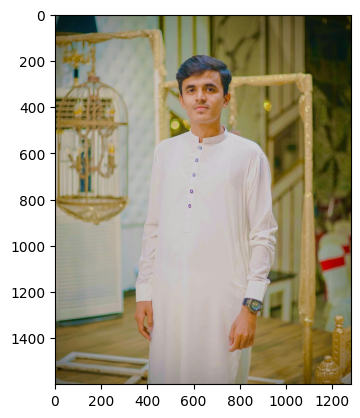

Face matched with:  asad With distance:  0.8539443612098694


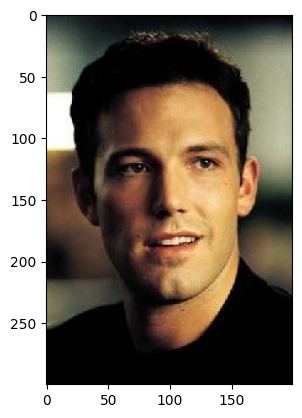

Face matched with:  ben_afflek With distance:  0.6713104844093323


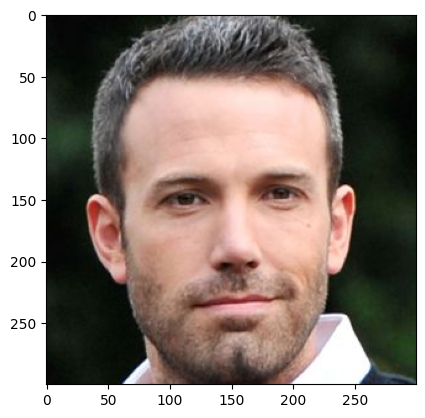

Face matched with:  ben_afflek With distance:  0.710729718208313


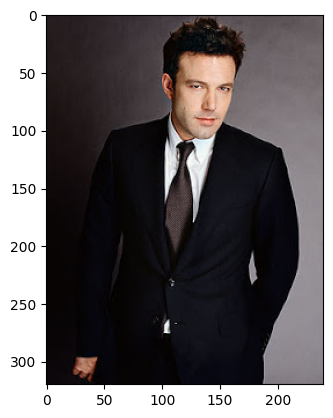

Face matched with:  ben_afflek With distance:  0.3692101240158081


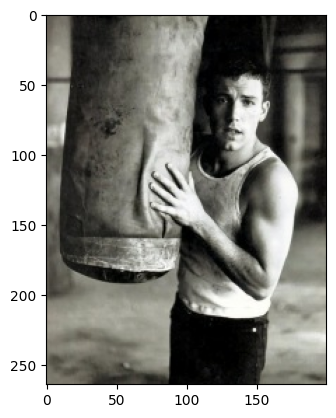

Face matched with:  ben_afflek With distance:  0.98853999376297


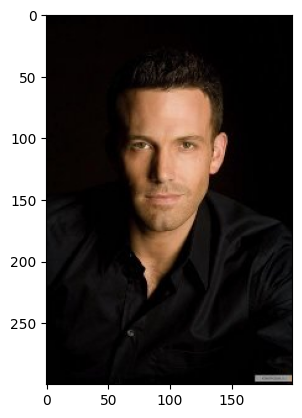

Face matched with:  ben_afflek With distance:  0.609997570514679


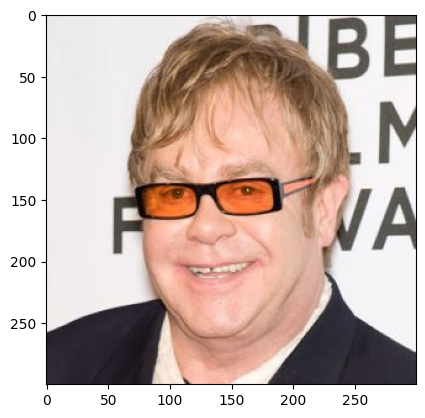

Face matched with:  elton_john With distance:  0.4665969908237457


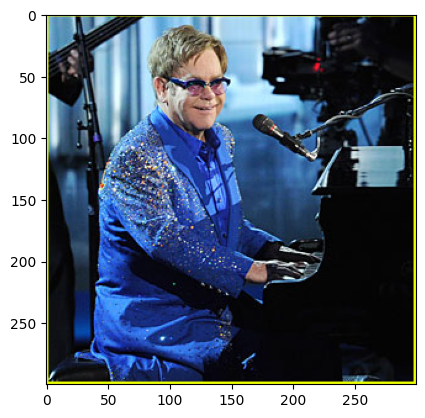

Face matched with:  elton_john With distance:  0.9173516035079956


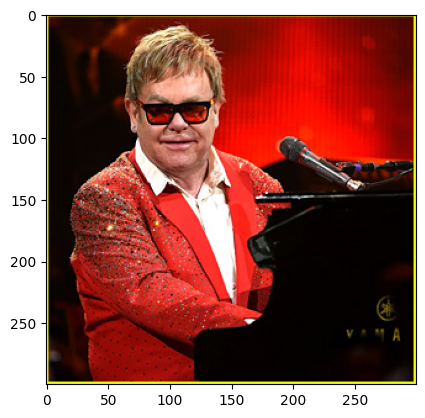

Face matched with:  elton_john With distance:  0.5219963192939758


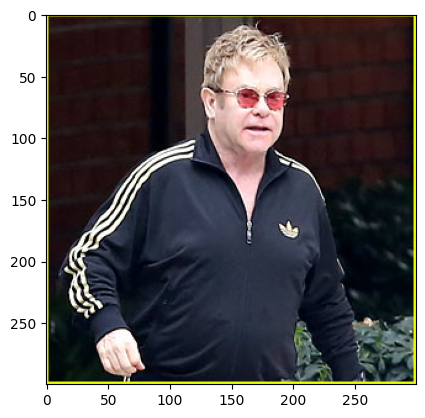

Face matched with:  elton_john With distance:  0.6684393882751465


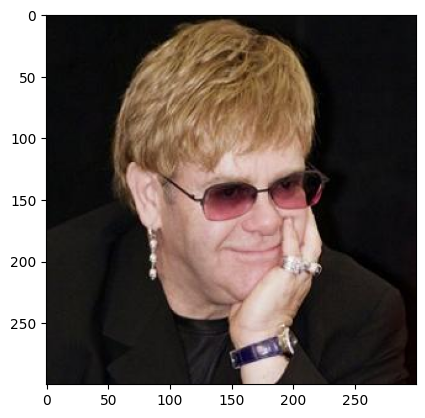

Face matched with:  elton_john With distance:  0.521898627281189


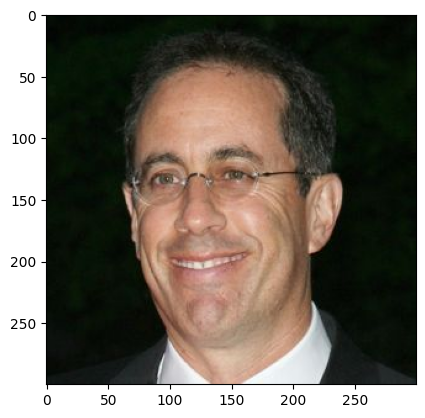

Face matched with:  jerry_seinfeld With distance:  0.49666109681129456


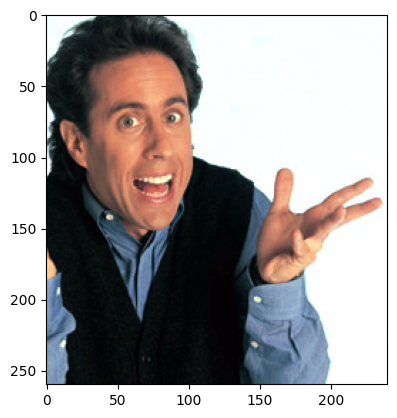

Face matched with:  jerry_seinfeld With distance:  0.7821803689002991


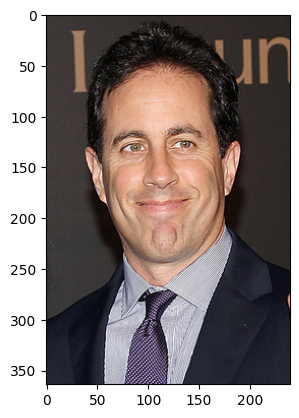

Face matched with:  jerry_seinfeld With distance:  0.6420571804046631


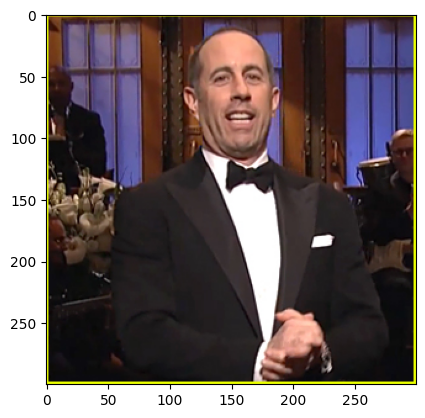

Face matched with:  jerry_seinfeld With distance:  0.6341730356216431


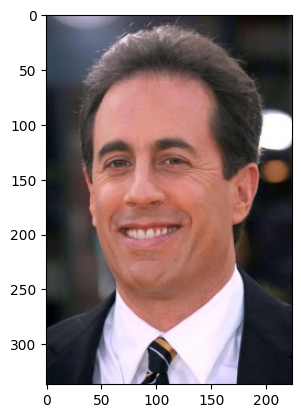

Face matched with:  jerry_seinfeld With distance:  0.6101173162460327


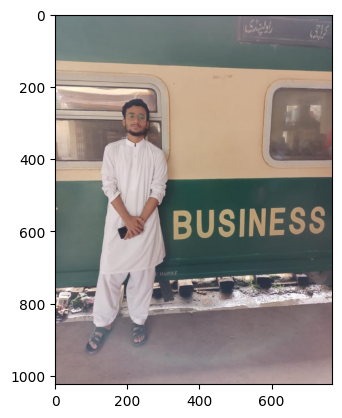

Face matched with:  khizar With distance:  0.9078930616378784


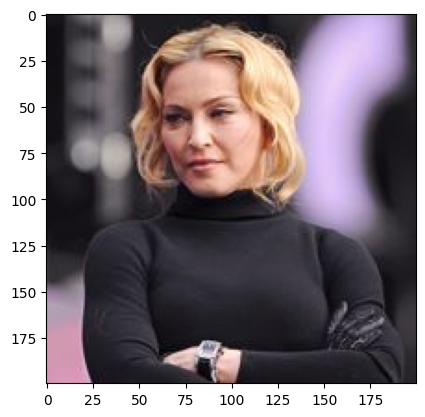

Face matched with:  madonna With distance:  0.7856674194335938


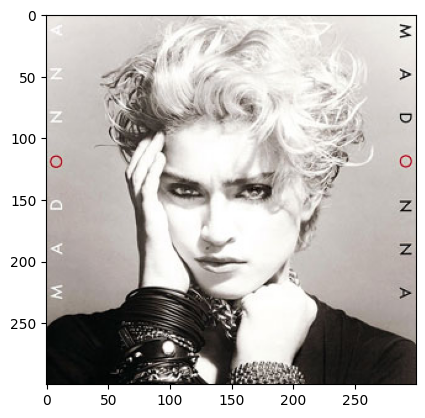

Face matched with:  madonna With distance:  0.7600957751274109


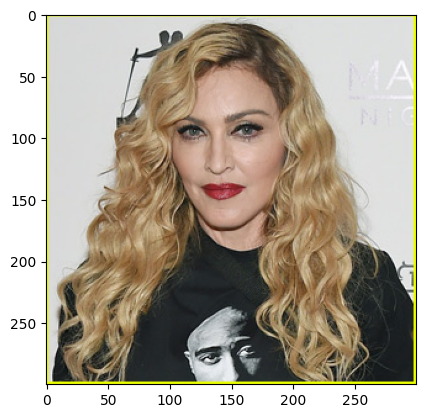

Face matched with:  madonna With distance:  0.6608211398124695


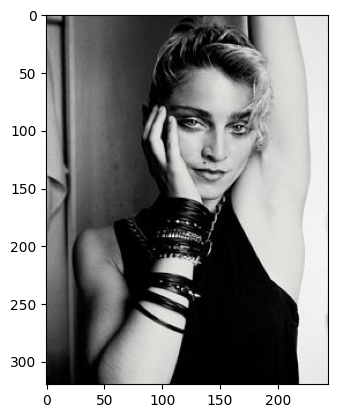

Face matched with:  madonna With distance:  0.822418212890625


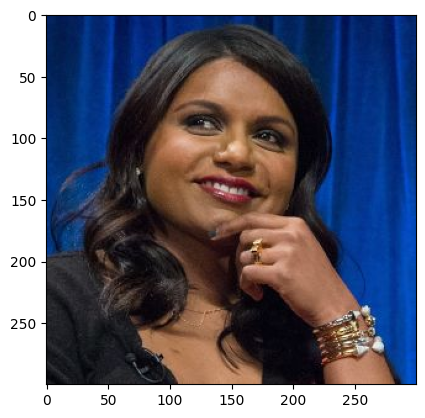

Face matched with:  mindy_kaling With distance:  0.6928378343582153


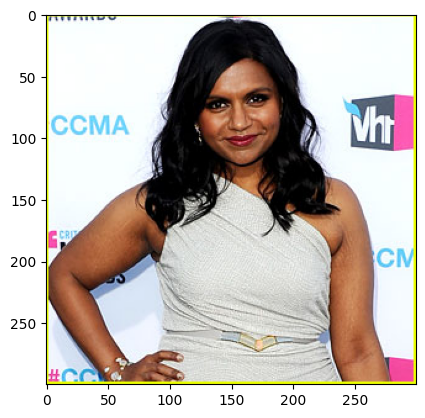

Face matched with:  mindy_kaling With distance:  0.5516436696052551


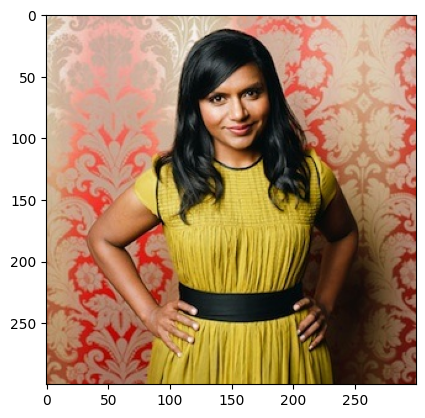

Face matched with:  mindy_kaling With distance:  0.47468242049217224


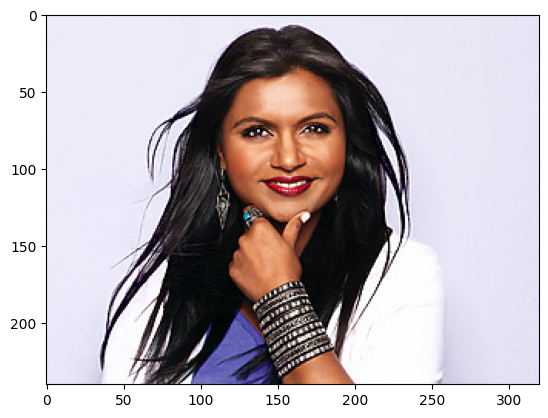

Face matched with:  mindy_kaling With distance:  0.6567570567131042


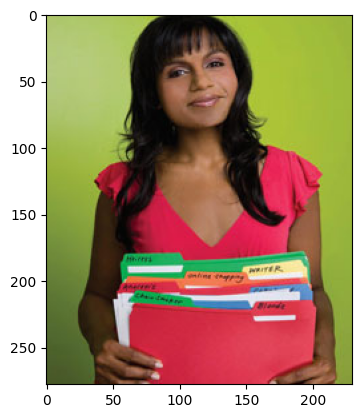

Face matched with:  mindy_kaling With distance:  0.7782418727874756


In [41]:
image_paths
for i in image_paths:
    result = face_match(i, 'data.pt')
    plt.imshow(plt.imread(i))
    plt.show()
    print('Face matched with: ',result[0], 'With distance: ',result[1])